In [22]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import or_gym
%matplotlib inline
plt.style.use('cmu_paper')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

path = '/home/christian/PPO_POEnv_2020-07-19_10-50-34e7a81co4'
path = '/home/christian/ray_results/PPO/PPO_PortfolioOpt-v0_0_entropy_coeff=0.01,kl_target=0.01,lr=0.0001_2020-08-10_11-58-28ceb16_63'

# MPAA-v0

In [23]:
def extract_plot_stats(path, window=1000):
    ep_stats = ['hist_stats/episode_reward']
    train_data = pd.read_csv(path + '/progress.csv')
    for i in ep_stats:
        vals = None
        ep_vals = train_data[i].values
        for j in ep_vals:
            ep_vals = np.array(re.findall(r"[-+]?\d*\.\d+|\d+", j)).astype(float)
            if vals is None:
                vals = ep_vals.copy()
            else:
                vals = np.hstack([vals, ep_vals.copy()])

    reward_var = np.array([np.std(vals[i-window:i+1]) 
                           if i>window else np.std(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    med_reward = np.array([np.median(vals[i-window:i+1]) 
                           if i>window else np.median(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_max = np.array([np.max(vals[i-window:i+1]) 
                           if i>window else np.max(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    ep_min = np.array([np.min(vals[i-window:i+1]) 
                           if i>window else np.min(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    mean_vals = np.array([np.mean(vals[i-window:i+1]) 
                           if i>window else np.mean(vals[:i+1]) 
                           for i, j in enumerate(vals)])
    fill_max = mean_vals + reward_var
    fill_min = mean_vals - reward_var
#     if np.max(mean_vals) > 0:
#         fill_max = np.where(mean_vals + reward_var<=ep_max, mean_vals+reward_var, ep_max)
#         fill_min = np.where(mean_vals - reward_var>0, mean_vals-reward_var, 0)
#     else:
#         fill_max = np.where(mean_vals + reward_var<=0, mean_vals+reward_var, ep_max)
#         fill_min = np.where(mean_vals - reward_var>ep_min, mean_vals-reward_var, ep_min)
        
    data_dict = {'mean_rewards': mean_vals, 
                 'med_rewards': med_reward,
                 'std_rewards': reward_var,
                 'ep_min': ep_min, 
                 'ep_max': ep_max, 
                 'fill_max': fill_max, 
                 'fill_min': fill_min}
    return pd.DataFrame(data_dict)

In [45]:
# p0 = extract_plot_stats('/home/christian/PPO_POEnv_2020-07-11_16-21-04817dahou/')
p0 = extract_plot_stats(path, window=1000)

/home/christian/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


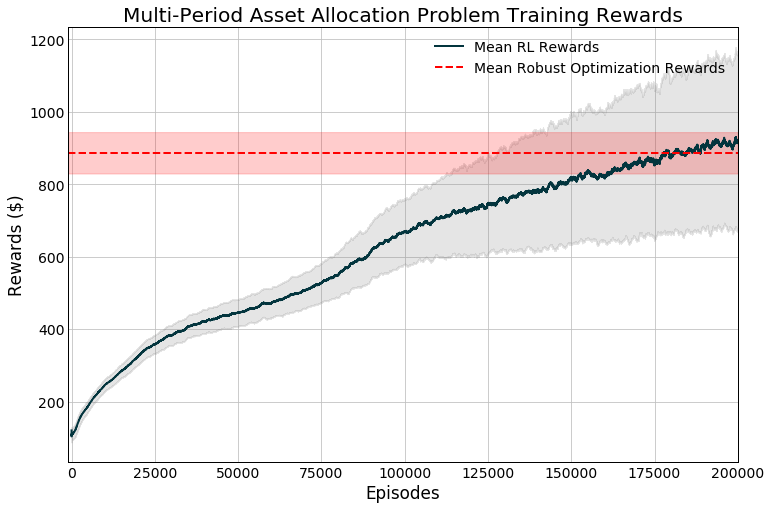

In [46]:
# Get episode totals
x_min = -1000
x_max = len(p0['mean_rewards'])
# opt_mean = -438.8
# opt_var = 111
heur_mean = 886.9
heur_var = 57.2

linestyles = ['--', '-.', ':', '-']

plt.figure(figsize=(12,8))
plt.plot(p0['mean_rewards'], label='Mean RL Rewards')
plt.fill_between(np.arange(p0.shape[0]), p0['fill_min'], p0['fill_max'],
                 color='gray', alpha=0.2)

plt.axhline(xmin=0, xmax=x_max, y=heur_mean, 
            color='r', linestyle=linestyles[0],
            label='Mean Robust Optimization Rewards')
plt.fill_between(np.arange(x_min, x_max), heur_mean-heur_var, 
                 heur_mean+heur_var, color='r', alpha=0.2)

# plt.axhline(xmin=0, xmax=x_max, y=opt_mean, 
#             color='orange', linestyle=linestyles[2],
#             label='Mean Optimal Reward')
# plt.fill_between(np.arange(x_min, x_max), opt_mean-opt_var, 
#                  opt_mean+opt_var, color='orange', alpha=0.2)

plt.title('Multi-Period Asset Allocation Problem Training Rewards')
# plt.legend(bbox_to_anchor=[1.05, 0.75])
plt.legend()
plt.ylabel('Rewards ($)')
plt.xlabel('Episodes')
plt.xlim([x_min, x_max])
plt.show()

In [17]:
# RO actions
ro_buy = np.zeros((3, 10))
ro_buy[0, 1] = 17.317502573220708
ro_buy[0, 5] = 61.64498871776095
ro_buy[0, 8] = 0.0002959973826463085
ro_buy[0, 9] = 16.044757570594317
ro_buy[1, 3] = 0.0025419768024847107
ro_buy[1, 4] = 46.96021077799236
ro_buy[1, 9] = 17.47020543125308
ro_buy[2, 0] = 16.103363257192388
ro_buy[2, 2] = 16.062611082407606
ro_buy[2, 8] = 57.17793624084347

ro_sell = np.zeros(ro_buy.shape)
ro_sell[0, 2] = 17.317502573220704
ro_sell[0, 8] = 61.64528471514359
ro_sell[1, 3] = 0.0015265265181479929
ro_sell[1, 4] = 0.008592693247414337
ro_sell[1, 5] = 46.952633535029285
ro_sell[2, 0] = 0.000493377003248131
ro_sell[2, 1] = 15.944918502243658
ro_sell[2, 3] = 0.0011438456028472121
ro_sell[2, 4] = 16.219418154053166
ro_sell[2, 9] = 35.746115699284

ro_action = (ro_buy - ro_sell).T
ro_action

array([[ 0.00000000e+00,  0.00000000e+00,  1.61028699e+01],
       [ 1.73175026e+01,  0.00000000e+00, -1.59449185e+01],
       [-1.73175026e+01,  0.00000000e+00,  1.60626111e+01],
       [ 0.00000000e+00,  1.01545028e-03, -1.14384560e-03],
       [ 0.00000000e+00,  4.69516181e+01, -1.62194182e+01],
       [ 6.16449887e+01, -4.69526335e+01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.16449887e+01,  0.00000000e+00,  5.71779362e+01],
       [ 1.60447576e+01,  1.74702054e+01, -3.57461157e+01]])

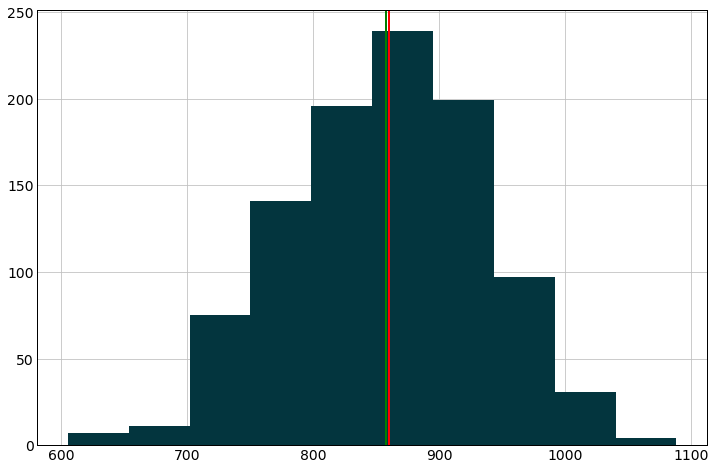

Median:	860.32
Mean:	857.54
STD:	77.70
Min:	605.20


In [73]:
env = or_gym.make('PortfolioOpt-v0')
N = 1000
ro_rewards = np.zeros(N)
for n in range(N):
    env.reset()
    reward = 0
    for i in range(env.step_limit):
        action = ro_action[i]
        s, r, d, _ = env.step(action)
        reward += r
        
    ro_rewards[n] = reward
    
plt.figure(figsize=(12,8))
plt.hist(ro_rewards, bins=10)
plt.axvline(np.median(ro_rewards), c='r')
plt.axvline(np.mean(ro_rewards), c='g')
plt.show()

print("Median:\t{:.2f}".format(np.median(ro_rewards)))
print("Mean:\t{:.2f}".format(np.mean(ro_rewards)))
print("STD:\t{:.2f}".format(np.std(ro_rewards)))
print("Min:\t{:.2f}".format(np.min(ro_rewards)))

In [28]:
import ray
from ray.rllib import agents
import json
import os
from or_gym.utils import *
import pickle
import pickle5
ray.init(ignore_reinit_error=True)

2020-08-10 12:59:19,095	INFO resource_spec.py:212 -- Starting Ray with 5.81 GiB memory available for workers and up to 2.92 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-10 12:59:19,473	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.0.11',
 'raylet_ip_address': '192.168.0.11',
 'redis_address': '192.168.0.11:44899',
 'object_store_address': '/tmp/ray/session_2020-08-10_12-59-19_094343_29105/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-08-10_12-59-19_094343_29105/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-08-10_12-59-19_094343_29105'}

In [29]:
config = pickle.load(open(f"{path}/params.pkl", "rb"))

In [55]:
checkpoint_id = '500'
trainer = agents.ppo.PPOTrainer(config, env=create_env('PortfolioOpt-v0'))
trainer.restore(f"{path}/checkpoint_{checkpoint_id}/checkpoint-{checkpoint_id}")

2020-08-10 13:13:08,483	INFO trainable.py:217 -- Getting current IP.
2020-08-10 13:13:08,484	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-08-10 13:13:08,567	INFO trainable.py:217 -- Getting current IP.
2020-08-10 13:13:08,567	INFO trainable.py:423 -- Restored on 192.168.0.11 from checkpoint: /home/christian/ray_results/PPO/PPO_PortfolioOpt-v0_0_entropy_coeff=0.01,kl_target=0.01,lr=0.0001_2020-08-10_11-58-28ceb16_63/checkpoint_500/checkpoint-500
2020-08-10 13:13:08,568	INFO trainable.py:430 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': 2000000, '_time_total': 3369.4430768489838, '_episodes_total': 200000}


In [56]:
env = or_gym.make('PortfolioOpt-v0')
N = 1000
rl_rewards = np.zeros(N)
for n in range(N):
    state = env.reset()
    reward = 0
    while True:
        action = trainer.compute_action(state)
        state, r, d, _ = env.step(action)
        reward += r
        if d:
            rl_rewards[n] += reward
            break

In [57]:
np.mean(rl_rewards)

909.551246753278

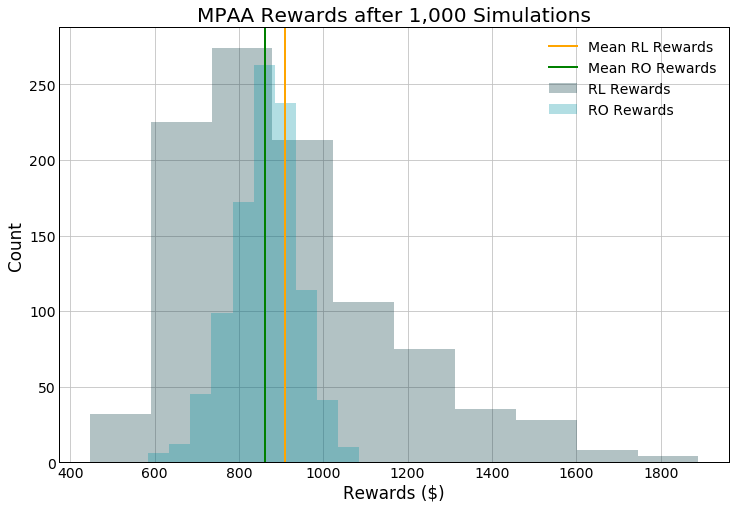

In [62]:
n_bins = 10
plt.figure(figsize=(12,8))
plt.hist(rl_rewards, bins=n_bins, alpha=0.3, label='RL Rewards')
plt.axvline(np.mean(rl_rewards), c='orange', label='Mean RL Rewards')

plt.hist(ro_rewards, bins=n_bins, alpha=0.3, label='RO Rewards')
plt.axvline(np.mean(ro_rewards), c='g', label='Mean RO Rewards')
plt.legend()
plt.title('MPAA Rewards after 1,000 Simulations')
plt.xlabel('Rewards ($)')
plt.ylabel('Count')
plt.show()

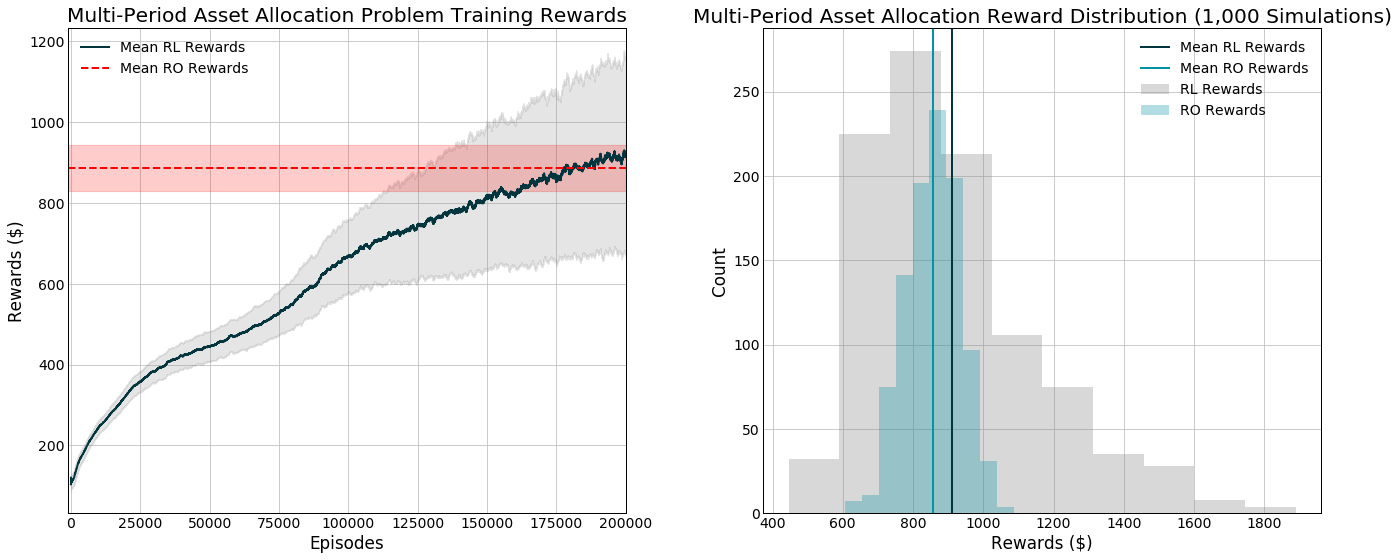

In [88]:
# Get episode totals
x_min = -1000
x_max = len(p0['mean_rewards'])
# opt_mean = -438.8
# opt_var = 111
heur_mean = 886.9
heur_var = 57.2

n_bins = 10

linestyles = ['--', '-.', ':', '-']

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(p0['mean_rewards'], label='Mean RL Rewards')
ax[0].fill_between(np.arange(p0.shape[0]), p0['fill_min'], p0['fill_max'],
                 color='gray', alpha=0.2)

ax[0].axhline(xmin=0, xmax=x_max, y=heur_mean, 
            color='r', linestyle=linestyles[0],
            label='Mean RO Rewards')
ax[0].fill_between(np.arange(x_min, x_max), heur_mean-heur_var, 
                 heur_mean+heur_var, color='r', alpha=0.2)

ax[0].set_title('Multi-Period Asset Allocation Problem Training Rewards')
ax[0].legend(loc=2)
ax[0].set_ylabel('Rewards ($)')
ax[0].set_xlabel('Episodes')
ax[0].set_xlim([x_min, x_max])

ax[1].hist(rl_rewards, bins=n_bins, alpha=0.3, color='grey', label='RL Rewards')
ax[1].axvline(np.mean(rl_rewards), c=colors[0], label='Mean RL Rewards')

ax[1].hist(ro_rewards, bins=n_bins, alpha=0.3, color=colors[1], label='RO Rewards')
ax[1].axvline(np.mean(ro_rewards), c=colors[1], label='Mean RO Rewards')
ax[1].legend()
ax[1].set_title('Multi-Period Asset Allocation Reward Distribution (1,000 Simulations)')
ax[1].set_xlabel('Rewards ($)')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [87]:
rl_rewards.min()

446.3245406692844